In [4]:
def count_words(text):
    """
    Contar a quantidade de vezes que uma palavra ocorre. Retornando
    um dicionário que as palavras são a chave e os valores são a quantidade
    de repetições. Skip ponctuation
    """
    text = text.lower()
    skips = [".", ",", ";", ":", "'", '"']
    for ch in skips:
        text = text.replace(ch, "")
    word_counts = {}
    for word in text.split(" "):
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1
    return word_counts
    

In [6]:
from collections import Counter
def count_words_fast(text):
    """
    Contar a quantidade de vezes que uma palavra ocorre. Retornando
    um dicionário que as palavras são a chave e os valores são a quantidade
    de repetições. Skip ponctuation
    """
    text = text.lower()
    skips = [".", ",", ";", ":", "'", '"']
    for ch in skips:
        text = text.replace(ch, "")
    word_counts =  Counter(text.split(" "))
    return word_counts

In [8]:
len(count_words("This comprehension check is to check for comprehension."))

6

In [9]:
text = "This comprehension check is to check for comprehension."
count_words(text) is count_words_fast(text)

False

In [12]:
def read_book(title_path):
    """
    Lê livro e retorna  o conteudo como texto
    """
    
    with open(title_path, encoding="utf8") as current_file:
        text = current_file.read()
        text = text.replace("\n", "").replace("\r", "")
    return text

In [42]:
text = read_book("./Books/English/shakespeare/Romeo and Juliet.txt")

len(text)

169275

In [16]:
ind = text.find("What's in a name?")
ind

42757

In [18]:
sample_text = text[ind : ind + 1000]
sample_text

"What's in a name? That which we call a rose    By any other name would smell as sweet.    So Romeo would, were he not Romeo call'd,    Retain that dear perfection which he owes    Without that title. Romeo, doff thy name;    And for that name, which is no part of thee,    Take all myself.  Rom. I take thee at thy word.    Call me but love, and I'll be new baptiz'd;    Henceforth I never will be Romeo.  Jul. What man art thou that, thus bescreen'd in night,    So stumblest on my counsel?  Rom. By a name    I know not how to tell thee who I am.    My name, dear saint, is hateful to myself,    Because it is an enemy to thee.    Had I it written, I would tear the word.  Jul. My ears have yet not drunk a hundred words    Of that tongue's utterance, yet I know the sound.    Art thou not Romeo, and a Montague?  Rom. Neither, fair saint, if either thee dislike.  Jul. How cam'st thou hither, tell me, and wherefore?    The orchard walls are high and hard to climb,    And the place death, consid

In [22]:
def word_stats(word_counts):
    """
    Retorna a quantidade e frequencia das palavras
    """
    num_unique = len(word_counts)
    counts = word_counts.values()
    return (num_unique, counts)

In [43]:
word_counts = count_words(text)
(num_unique, counts) = word_stats(word_counts)
num_unique

5118

In [44]:
sum(counts)

40776

In [39]:
text_g = read_book("./Books/German/shakespeare/Romeo und Julia.txt")

In [40]:
word_counts = count_words(text_g)
(num_unique, counts) = word_stats(word_counts)
num_unique

7527

In [41]:
sum(counts)

20311

In [59]:
import os
import pandas as pd

book_dir = "./Books"

stats = pd.DataFrame(columns=("language", "author", "title", "length",  "unique"))
title_num = 1
for language in os.listdir(book_dir):
    for author in os.listdir(book_dir + "/" + language):
        for title in os.listdir(book_dir + "/" + language + "/" + author):
            inputfile = book_dir + "/" + language + "/" + author + "/" + title
            text = read_book(inputfile)
            (num_unique, counts) = word_stats(count_words(text))
            stats.loc[title_num] = language, author.capitalize(), title.replace(".txt",""), sum(counts), num_unique 
            title_num += 1

stats

,language,author,title,length,unique
1,English,Shakespeare,A Midsummer Night's Dream,16103,4345
2,English,Shakespeare,Hamlet,28551,6776
3,English,Shakespeare,Macbeth,16874,4780
4,English,Shakespeare,Othello,26590,5898
5,English,Shakespeare,Richard III,48315,5449
...,...,...,...,...,...
98,Portuguese,Queir┬ós,O crime do padre Amaro,128630,29300
99,Portuguese,Queir┬ós,O Mandarim,21440,7836
100,Portuguese,Queir┬ós,O Primo Bazilio,107303,27644
101,Portuguese,Queir┬ós,Os Maias,195771,40665


In [52]:
stats.head()

,language,author,title,length,unique
1,English,shakespeare,A Midsummer Night's Dream.txt,16103,4345
2,English,shakespeare,Hamlet.txt,28551,6776
3,English,shakespeare,Macbeth.txt,16874,4780
4,English,shakespeare,Othello.txt,26590,5898
5,English,shakespeare,Richard III.txt,48315,5449


In [46]:


table = pd.DataFrame(columns = ("name", "age"))
table.loc[1] = "James", 32
table.loc[2] = "Jess", 22
table

,name,age
1,James,32
2,Jess,22


In [54]:
stats.tail()

,language,author,title,length,unique
98,Portuguese,Queir┬ós,O crime do padre Amaro.txt,128630,29300
99,Portuguese,Queir┬ós,O Mandarim.txt,21440,7836
100,Portuguese,Queir┬ós,O Primo Bazilio.txt,107303,27644
101,Portuguese,Queir┬ós,Os Maias.txt,195771,40665
102,Portuguese,shakespeare,Hamlet.txt,30567,9700


In [62]:
type(os.listdir(book_dir))

list

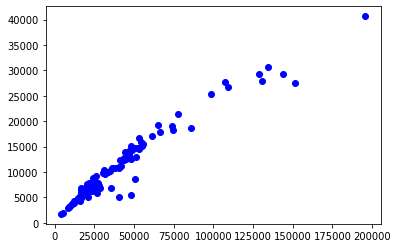

In [64]:
import matplotlib.pyplot as plt
plt.plot(stats.length, stats.unique, "bo")

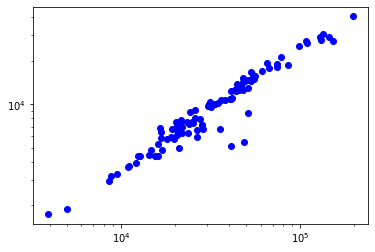

In [65]:
plt.loglog(stats.length, stats.unique, "bo")

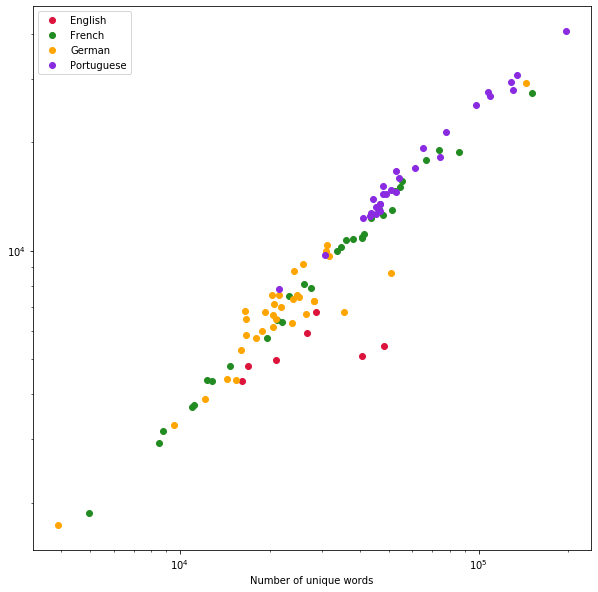

In [66]:
plt.figure(figsize =(10,10))
subset = stats[stats.language == "English"]
plt.loglog(subset.length, subset.unique, "o", label ="English", color="crimson")

subset = stats[stats.language == "French"]
plt.loglog(subset.length, subset.unique, "o", label ="French", color="forestgreen")

subset = stats[stats.language == "German"]
plt.loglog(subset.length, subset.unique, "o", label ="German", color="orange")

subset = stats[stats.language == "Portuguese"]
plt.loglog(subset.length, subset.unique, "o", label ="Portuguese", color="blueviolet")
plt.legend()
plt.xlabel("Book length")
plt.xlabel("Number of unique words")
plt.savefig("lang_plot.pdf")

In [67]:
stats["length"]

1       16103
2       28551
3       16874
4       26590
5       48315
        ...  
98     128630
99      21440
100    107303
101    195771
102     30567
Name: length, Length: 102, dtype: object

In [69]:
stats.length

1       16103
2       28551
3       16874
4       26590
5       48315
        ...  
98     128630
99      21440
100    107303
101    195771
102     30567
Name: length, Length: 102, dtype: object

In [73]:
stats[stats.language == "French"]

,language,author,title,length,unique
8,French,Chevalier,L'a╠èle de sable,73801,18989
9,French,Chevalier,L'enfer et le paradis de l'autre monde,40827,10831
10,French,Chevalier,La capitaine,46306,13083
11,French,Chevalier,La fille des indiens rouges,66621,17875
12,French,Chevalier,La fille du pirate,52519,14649
13,French,Chevalier,Le chasseur noir,51341,12945
14,French,Chevalier,Les derniers Iroquois,55565,15583
15,French,De maupassant,Boule de Suif,35905,10725
16,French,De maupassant,Claire de Lune,25975,8076
17,French,De maupassant,Contes de la Becasse,34723,10210
